# Benchmarking: Compare different scores with the fingerprint-based similarities

In [1]:
import os
import sys
import numpy as np

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA\\matchms\\data\\'
sys.path.insert(0, ROOT)

### Import reference similarity matrix

In [2]:
filename = os.path.join(path_data,'similarities_daylight2048_jaccard.npy')
matrix_similarities_fingerprint_daylight = np.load(filename)

In [3]:
np.any(np.isnan(matrix_similarities_fingerprint_daylight))

True

### Import already computed similarity matrix: Cosine Score

In [6]:
filename = os.path.join(path_data,'similarities_cosine_tol0005_200708.npy')
matrix_similarities_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_cosine_tol0005_200708_matches.npy')
matrix_matches_cosine = np.load(filename)

print("Matrix dimension", matrix_matches_cosine.shape)

Matrix dimension (12797, 12797)


In [7]:
from custom_functions.plotting_functions import plot_precentile

In [8]:
# Only consider values for mininum 6 matching peaks
matrix_similarities_cosine_minmatch6 = matrix_similarities_cosine.copy()
matrix_similarities_cosine_minmatch6[matrix_matches_cosine < 6] = 0

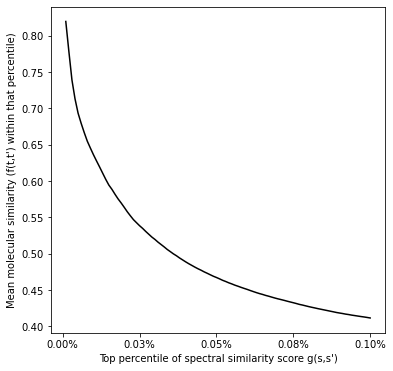

In [9]:
percentile_cosine_tol0005 = plot_precentile(matrix_similarities_fingerprint_daylight,
                                            matrix_similarities_cosine_minmatch6,
                                            num_bins=100, show_top_percentile=0.1,
                                            ignore_diagonal=True)

### Import already computed similarity matrix: Modified cosine score

In [10]:
filename = os.path.join(path_data,'similarities_mod_cosine_tol0005_200727.npy')
matrix_similarities_mod_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_mod_cosine_tol0005_200727_matches.npy')
matrix_matches_mod_cosine = np.load(filename)

In [11]:
# Only consider values for mininum 10 matching peaks
matrix_similarities_mod_cosine_minmatch10 = matrix_similarities_mod_cosine.copy()
matrix_similarities_mod_cosine_minmatch10[matrix_matches_mod_cosine < 10] = 0

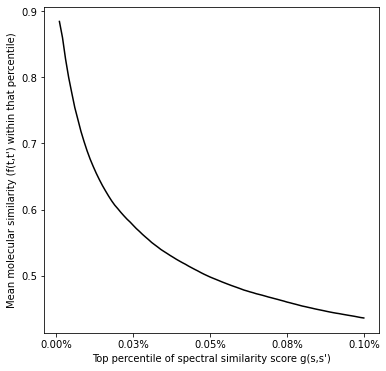

In [12]:
percentile_mod_cosine_tol0005 = plot_precentile(matrix_similarities_fingerprint_daylight,
                                            matrix_similarities_mod_cosine_minmatch10,
                                            num_bins=100, show_top_percentile=0.1,
                                            ignore_diagonal=True)

## Compare spec2vec with reference fingerprint scores

In [13]:
filename = os.path.join(path_data,'similarities_spec2vec_2dec_UniqueInchikeys_iter_50.npy')
matrix_similarities_spec2vec = np.load(filename)

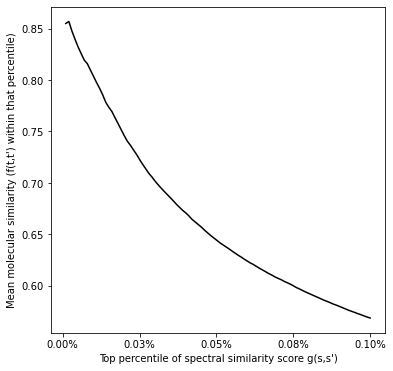

In [14]:
percentile_spec2vec_2dec_iter_50 = plot_precentile(matrix_similarities_fingerprint_daylight,
                                                   matrix_similarities_spec2vec,
                                                   num_bins=100, show_top_percentile=0.1,
                                                   ignore_diagonal=True)

## Compare spec2vec (trained on AllPositive) with reference fingerprint scores

In [15]:
filename = os.path.join(path_data, "percentile_spec2vec_2dec_AllPosModel_iter_15.npy")
percentiles_AllPosModel = np.load(filename)

In [4]:
filename = os.path.join(path_data,'similarities_spec2vec_2dec_AllPositiveModel_15iter.npy')
matrix_similarities_spec2vec_allpositive = np.load(filename)

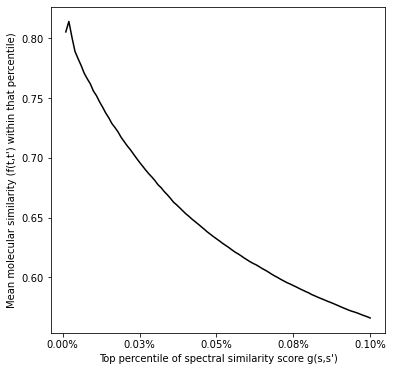

In [7]:
percentile_spec2vec_2dec_AllPos_15iter = plot_precentile(matrix_similarities_fingerprint_daylight,
                                                  matrix_similarities_spec2vec_allpositive,
                                                  num_bins=100, show_top_percentile=0.1,
                                                  ignore_diagonal=True)

In [17]:
from matplotlib import pyplot as plt

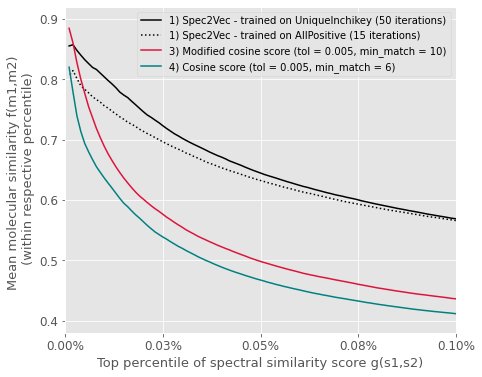

In [18]:
#Compare all:
num_bins = 100
show_top_percentile = 0.1

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

plt.plot(x_percentiles, percentile_spec2vec_2dec_iter_50, 
         color='black',
         label='1) Spec2Vec - trained on UniqueInchikey (50 iterations)')

plt.plot(x_percentiles, percentiles_AllPosModel, 
         ":", color='black',
         label='1) Spec2Vec - trained on AllPositive (15 iterations)')

plt.plot(x_percentiles, percentile_mod_cosine_tol0005, 
         color='crimson',
         label='3) Modified cosine score (tol = 0.005, min_match = 10)')

plt.plot(x_percentiles, percentile_cosine_tol0005, 
         color='teal', #'gold',
         label='4) Cosine score (tol = 0.005, min_match = 6)')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xticks(np.arange(0, 0.11, step=0.02), ('0.00%', '0.02%', '0.04%', '0.06%', '0.08%', '0.10%'))
plt.xticks(np.linspace(0, show_top_percentile, 5),
           ["{:.2f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend()
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.xlim(0, 0.1)
plt.ylim(0.38, 0.92)
plt.savefig(os.path.join(path_data, 'Benchmarking_top_percentil_comparison_200728.pdf'))